In [107]:
import pandas as pd


In [108]:
ratings = pd.read_csv("/Users/madisenleshoure/Downloads/netflix-report/CONTENT_INTERACTION/Ratings.csv")
ratings


,Profile Name,Title Name,Rating Type,Star Value,Thumbs Value,Device Model,Event Utc Ts,Region View Date
0,Kids,The Karate Kid,thumb,NaN,2,PS4,2021-11-22 05:26:30,NaN
1,Kids,Hotel for Dogs,thumb,NaN,2,iPhone,2021-04-10 06:46:57,NaN
2,Kids,The Little Rascals,thumb,NaN,2,iPhone,2021-04-10 06:45:26,NaN
3,Kids,We Can Be Heroes,thumb,NaN,2,iPhone,2021-01-09 06:09:15,NaN
4,Kids,Willy Wonka & the Chocolate Factory,thumb,NaN,2,iPhone,2020-01-30 05:16:44,NaN
...,...,...,...,...,...,...,...,...
280,Melodee,When They See Us,thumb,NaN,2,iPhone,2019-12-27 23:45:34,NaN
281,Melodee,Shooter,thumb,NaN,2,iPhone,2019-12-27 23:44:16,NaN
282,Melodee,Elite,thumb,NaN,2,iPhone,2019-12-27 23:43:47,NaN
283,Melodee,Being Mary Jane: The Series,thumb,NaN,2,iPhone,2019-12-27 23:41:43,NaN


In [109]:
activity = pd.read_csv("/Users/madisenleshoure/Downloads/netflix-report/CONTENT_INTERACTION/ViewingActivity.csv")
activity

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kids,2022-06-11 02:58:59,00:00:57,NaN,The Thundermans: Season 1: Adventures in Super...,NaN,Chrome PC (Cadmium),00:00:57,00:00:57,US (United States)
1,Kids,2022-06-11 02:55:17,00:00:14,Autoplayed: user action: None;,Henry Danger: Season 1_hook_04_16x9,HOOK,Chrome PC (Cadmium),00:00:14,00:00:14,US (United States)
2,Kids,2021-11-22 05:26:27,00:00:01,Autoplayed: user action: None;,The Karate Kid,NaN,Sony PS4,00:00:01,00:00:01,US (United States)
3,Kids,2021-07-10 08:12:44,00:00:04,Autoplayed: user action: None;,Avatar: The Last Airbender: Book 1: The King o...,NaN,Sony PS4,00:01:35,00:01:35,US (United States)
4,Kids,2021-07-10 07:50:55,00:21:48,NaN,Avatar: The Last Airbender: Book 1: The Warrio...,NaN,Sony PS4,00:23:21,00:23:21,US (United States)
...,...,...,...,...,...,...,...,...,...,...
10118,Nawal,2021-09-28 04:45:32,00:00:03,NaN,New Girl: Season 1: Wedding (Episode 3),NaN,Chrome OS (Cadmium),00:00:04,Not latest view,US (United States)
10119,Nawal,2021-09-28 04:45:17,00:00:03,NaN,New Girl: Season 1: Wedding (Episode 3),NaN,Chrome OS (Cadmium),00:00:03,Not latest view,US (United States)
10120,Nawal,2021-09-24 23:42:57,00:21:17,NaN,New Girl: Season 1: Wedding (Episode 3),NaN,Chrome OS (Cadmium),00:21:24,Not latest view,US (United States)
10121,Nawal,2021-09-24 23:21:28,00:21:19,NaN,New Girl: Season 1: Kryptonite (Episode 2),NaN,Chrome OS (Cadmium),00:21:26,00:21:26,US (United States)


In [110]:
activity.shape

(10123, 10)

In [111]:
df = activity.drop(["Profile Name", "Attributes", "Supplemental Video Type", 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

In [112]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [113]:
df["Start Time"] = pd.to_datetime(df["Start Time"], utc= True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [114]:
df = df.set_index("Start Time")

In [115]:
df.index = df.index.tz_convert("US/Eastern")

In [116]:
df = df.reset_index()
df.head(1)

,Start Time,Duration,Title
0,2022-06-10 22:58:59-04:00,00:00:57,The Thundermans: Season 1: Adventures in Super...


In [117]:
df["Duration"] = pd.to_timedelta(df["Duration"])

In [118]:
girlfriends = df[df["Title"].str.contains("Girlfriends", regex= False)]

In [119]:
girlfriends.shape

(843, 3)

In [120]:
girlfriends = girlfriends[(girlfriends["Duration"] > "0:01:00")]
girlfriends.shape

(753, 3)

In [121]:
girlfriends["Duration"].sum()

Timedelta('8 days 05:54:49')

In [122]:
girlfriends["weekday"] = girlfriends["Start Time"].dt.weekday
girlfriends["hour"] = girlfriends["Start Time"].dt.hour
girlfriends.head(1)

,Start Time,Duration,Title,weekday,hour
32,2023-05-16 01:49:37-04:00,0 days 00:14:04,Girlfriends: Season 2: Buh-Bye (Episode 5),1,1


In [123]:
import matplotlib as plt

In [124]:
girlfriends["weekday"] = pd.Categorical(girlfriends["weekday"], categories=[0,1,2,3,4,5,6], ordered= True)

In [125]:
girlfriends_by_day = girlfriends["weekday"].value_counts()

In [126]:
girlfriends_by_day = girlfriends_by_day.sort_index()

In [127]:
plt.rcParams.update({"font.size": 22})

<Axes: title={'center': 'Girlfriends Episodes Watched by Day'}>

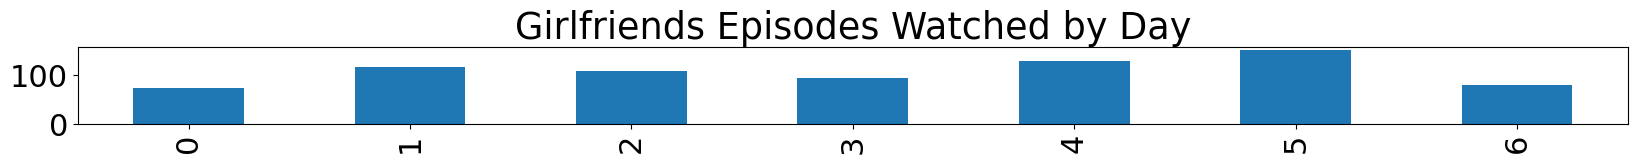

In [128]:
girlfriends_by_day.plot(kind = "bar", figsize=(20,1), title= "Girlfriends Episodes Watched by Day")

In [129]:
girlfriends["hous"] = pd.Categorical(girlfriends["hour"], categories= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

<Axes: title={'center': 'Girlfriends Episodes Watched by Hour'}>

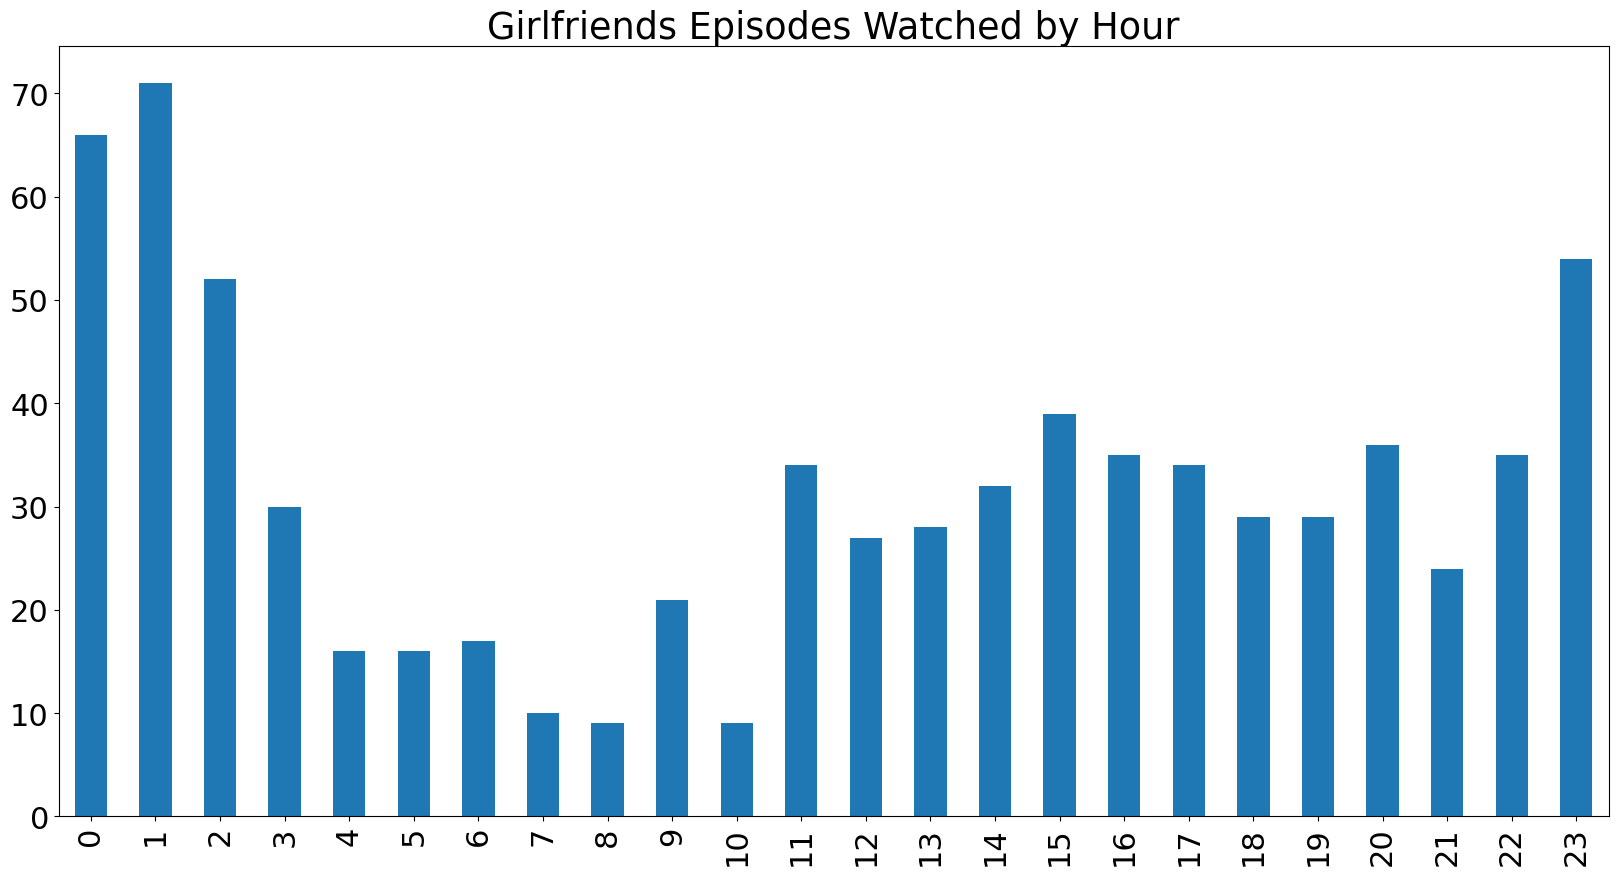

In [130]:
girlfriends_by_hour = girlfriends["hour"].value_counts()
girlfriends_by_hour = girlfriends_by_hour.sort_index()
girlfriends_by_hour.plot(kind="bar", figsize=(20,10), title= "Girlfriends Episodes Watched by Hour")

In [131]:
Moesha = df[df["Title"].str.contains("Moesha", regex= False)]

In [132]:
Moesha.shape

(542, 3)

In [133]:
Moesha = Moesha[(Moesha["Duration"] > "0:01:00")]

In [134]:
Moesha["Duration"].sum()

Timedelta('5 days 13:47:31')

In [137]:
Moesha["weekday"] = Moesha["Start Time"].dt.weekday
Moesha["hour"] = Moesha["Start Time"].dt.hour
Moesha.head(1)

,Start Time,Duration,Title,weekday,hour
57,2023-05-14 01:42:39-04:00,0 days 00:20:50,Moesha: Season 3: A House Is Not a Home (Episo...,6,1


In [138]:
Moesha["weekday"] = pd.Categorical(Moesha["weekday"], categories=[0,1,2,3,4,5,6], ordered= True)

In [139]:
Moesha_by_day = Moesha["weekday"].value_counts()

In [140]:
girlfriends_by_day = girlfriends_by_day.sort_index()
plt.rcParams.update({"font.size": 22})

<Axes: title={'center': 'Girlfriends Episodes Watched by Day'}>

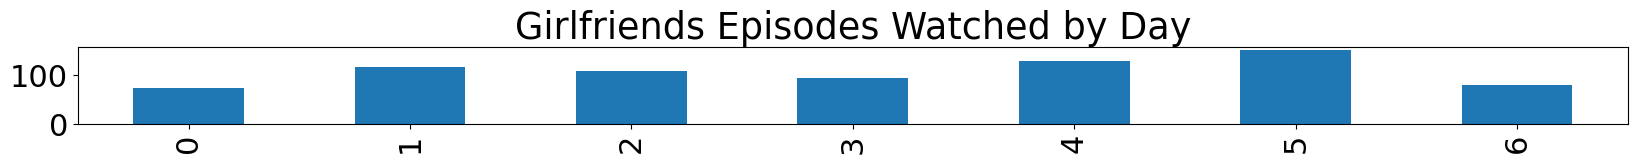

In [141]:
girlfriends_by_day.plot(kind = "bar", figsize=(20,1), title= "Girlfriends Episodes Watched by Day")

In [142]:
Moesha["hous"] = pd.Categorical(Moesha["hour"], categories= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

<Axes: title={'center': 'Girlfriends Episodes Watched by Hour'}>

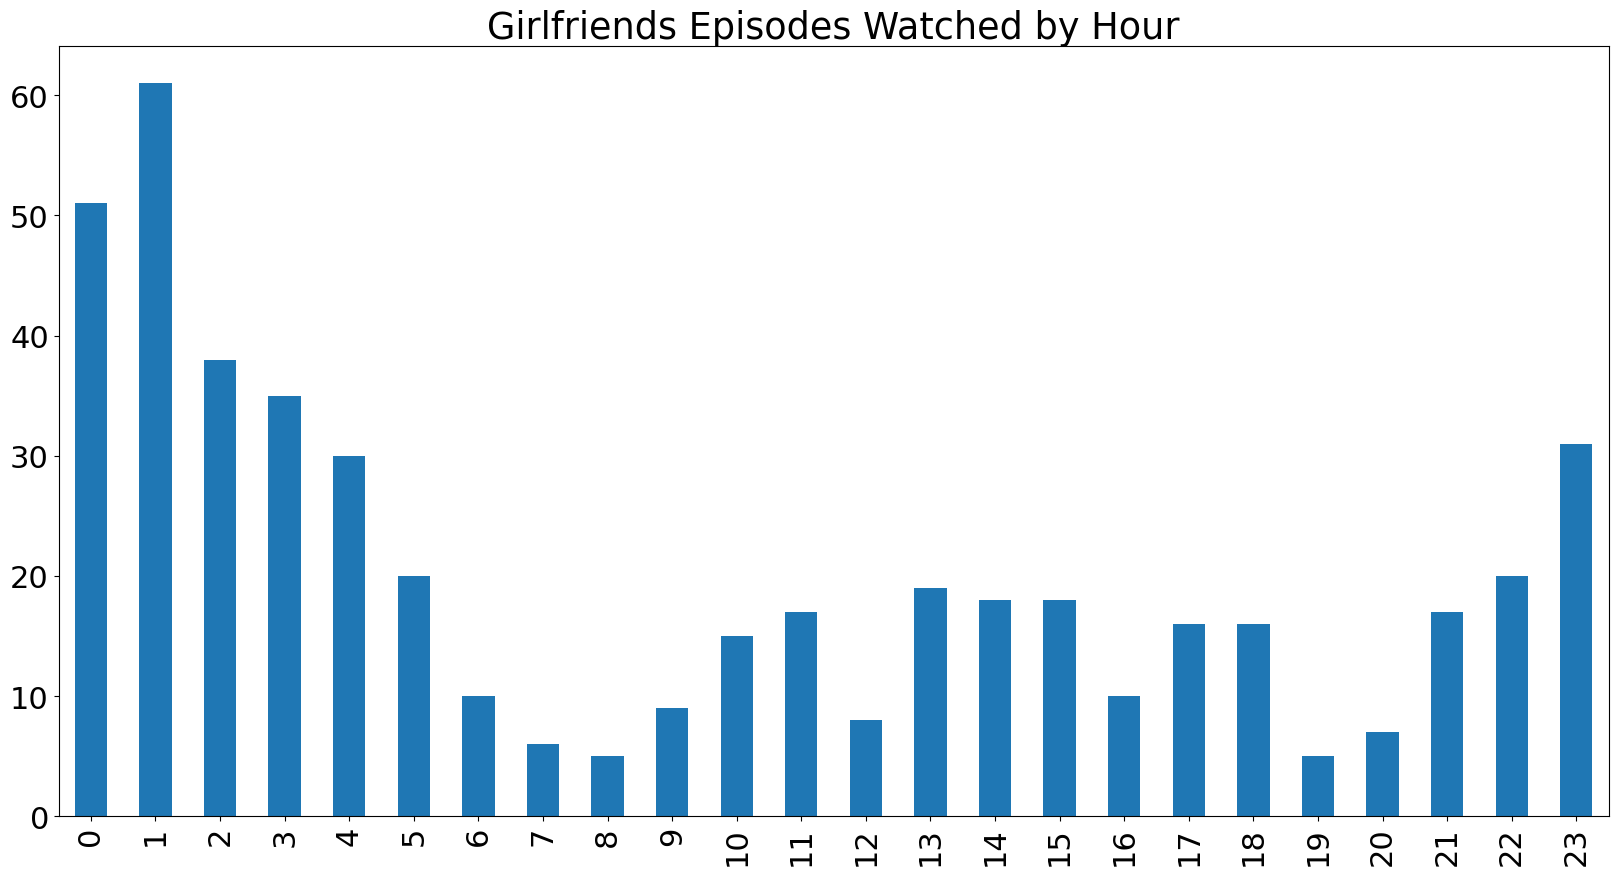

In [143]:
Moesha_by_hour = Moesha["hour"].value_counts()
Moesha_by_hour = Moesha_by_hour.sort_index()
Moesha_by_hour.plot(kind="bar", figsize=(20,10), title= "Girlfriends Episodes Watched by Hour")

In [ ]:
billing = pd.read_csv("/Users/madisenleshoure/Downloads/netflix-report/PAYMENT_AND_BILLING/BillingHistory.csv")
billing

,Transaction Date,Service Period Start Date,Service Period End Date,Description,Payment Type,Mop Last 4,Mop Creation Date,Mop Pmt Processor Desc,Item Price Amt,Currency,Tax Amt,Gross Sale Amt,Pmt Txn Type,Pmt Status,Final Invoice Result,Country,Next Billing Date
0,2023-05-06,2023-05-06,2023-06-05,SUBSCRIPTION,VISA,5704,NaN,VANTIV,15.49,USD,0.0,15.49,SALE,NEW,SETTLED,US,2023-06-06
1,2023-05-06,NaN,NaN,payment_transaction,CC,5704,NaN,NaN,NaN,USD,NaN,15.49,SALE,APPROVED,NaN,US,NaN
2,2023-05-06,2023-05-06,2023-06-05,SUBSCRIPTION,VISA,5704,NaN,VANTIV,15.49,USD,0.0,15.49,SALE,APPROVED,SETTLED,US,2023-06-06
3,2023-05-06,NaN,NaN,payment_transaction,CC,5704,NaN,NaN,NaN,USD,NaN,15.49,SALE,NEW,NaN,US,NaN
4,2023-04-06,2023-04-06,2023-05-05,SUBSCRIPTION,VISA,5704,NaN,VPP,15.49,USD,0.0,15.49,SALE,NEW,SETTLED,US,2023-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2020-03-26,2020-03-26,2020-04-25,SUBSCRIPTION,VISA,4609,NaN,PAYMENTECH,12.99,USD,0.0,12.99,NaN,NaN,SETTLED,US,2020-04-26
228,2020-02-26,2020-02-26,2020-03-25,SUBSCRIPTION,VISA,4609,NaN,PAYMENTECH,12.99,USD,0.0,12.99,NaN,NaN,SETTLED,US,2020-03-26
229,2020-01-26,2020-01-26,2020-02-25,SUBSCRIPTION,VISA,4609,NaN,PAYMENTECH,8.99,USD,0.0,8.99,NaN,NaN,SETTLED,US,2020-02-26
230,2019-12-27,NaN,NaN,payment_transaction,CC,4609,NaN,NaN,NaN,USD,NaN,0.00,VERIFY,APPROVED,NaN,US,NaN
